In [12]:
import yfinance as yf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import streamlit as st

In [13]:
def get_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

In [14]:
def preprocess_data(data):
    data['Date'] = data.index
    data['Date'] = data['Date'].astype('int64')# Convert date to Unix timestamp
    return data[['Date', 'Close']]

In [15]:
def split_data(data):
    X = data[['Date']]
    y = data['Close']
    return train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

In [17]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return predictions, mse

In [18]:
def plot_results(y_test, predictions):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test.index, y_test, color='black', label='Actual Prices')
    plt.plot(y_test.index, predictions, color='blue', linewidth=3, label='Predicted Prices')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

In [22]:
def main():
    symbol = 'TEL'  # Stock symbol (you can change this)
    start_date = '2007-01-01'
    end_date = '2024-01-01'

    # Step 1: Fetch historical stock data
    stock_data = get_stock_data(symbol, start_date, end_date)

    # Step 2: Preprocess data
    processed_data = preprocess_data(stock_data)

    # Step 3: Split data into training and testing sets
    X_train, X_test, y_train, y_test = split_data(processed_data)

    # Step 4: Train a linear regression model
    model = train_model(X_train, y_train)

    # Step 5: Evaluate the model
    predictions, mse = evaluate_model(model, X_test, y_test)
    print(f'Mean Squared Error: {mse}')

    # Step 6: Plot the results
    plot_results(y_test, predictions)

[*********************100%%**********************]  1 of 1 completed
Mean Squared Error: 173.7860068620213


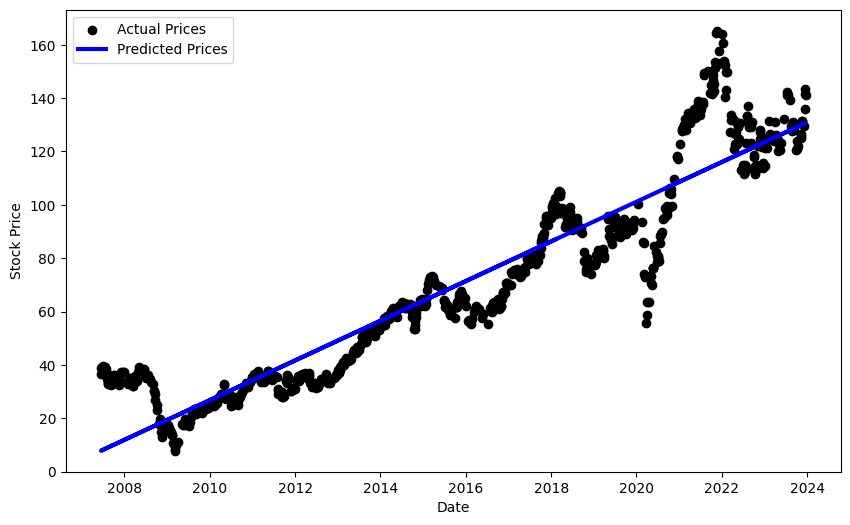

In [23]:
main()

In [25]:
import pandas as pd

chart_data = pd.DataFrame(
     np.random.randn(20, 3),
     columns=['a', 'b', 'c'])

st.line_chart(chart_data)

DeltaGenerator()